# Goal: Forecast 7 months of passenger useage
From the data certain hypotheses can be tested about passenger traffic:

1. will be higher from May to Oct: more public transport users in the warmer months.

2. will increase as the years progress: more people will use public transport when they learn/ are educated about its benefits.

3. will be higher during peak hours: public transport make be a more convenient option for people travelling to work/school.

4. will be lower on weekends: work/school-related travel will be lower on weekends.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from pandas import Series

import warnings

In [2]:
# Load provided training dataset
train=pd.read_csv(r"C:\Users\Ryan\Documents\courses- code\AnalyticsVidhya\Time Series Forecasting\data\Train_SU63ISt.csv")

In [3]:
# Load provided test dataset
test=pd.read_csv(r"C:\Users\Ryan\Documents\courses- code\AnalyticsVidhya\Time Series Forecasting\data\Test_0qrQsBZ.csv")

In [4]:
# preserve a copy as the 'original' dataframe
train_original=train.copy()
test_original=test.copy()

In [5]:
# Observe the data structure
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

The 'test' data does not contain 'count' which we need to predict.

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [7]:
# Feature extraction

# format the datetime column for data (and copies)
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [8]:
# separate the d,m,y & H

for i in (train, test, train_original, test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [9]:
train.head(2)  # shows the additional columns added

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1


In [10]:
# test the hypothesis that weekend traffic will be less than weekdays.

# extract day of the week from Datetime.
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [11]:
# with Monday as 0, day 5 & 6 are the weekend
# assign weekends as 1, weekday 0
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

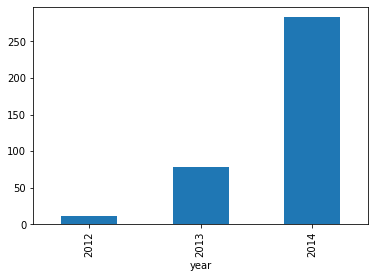

In [12]:
# Exploratory Analysis

# Hypotheis 1: traffic will increase as the years progress
train.groupby('year')['Count'].mean().plot.bar()

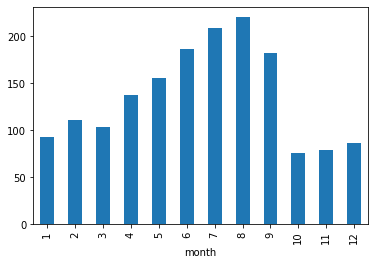

In [13]:
# hypothesis 2: traffic will be higher from May to Oct
train.groupby('month')['Count'].mean().plot.bar()

The sudden drop in the count is unexpected. Explore the count for each year separately.

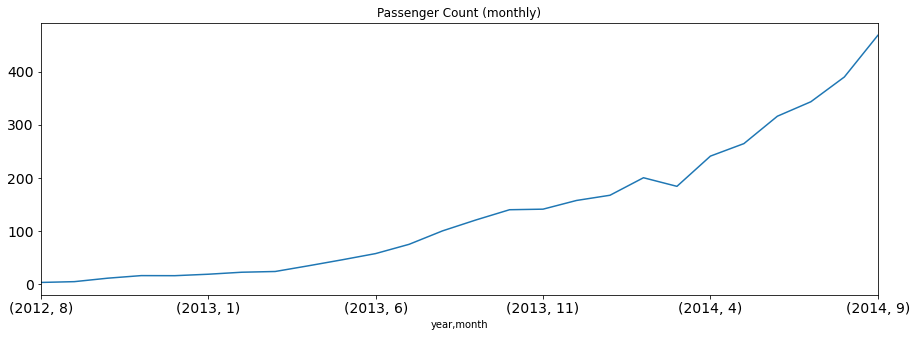

In [14]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5), title='Passenger Count (monthly)', fontsize=14)

The dataset ends Sept 2014, and does not contain Oct-Dec data.

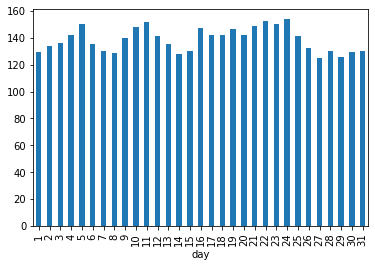

In [15]:
# Observe the daily mean of passenger count:
train.groupby('day')['Count'].mean().plot.bar()

no obvious insights from this plot.

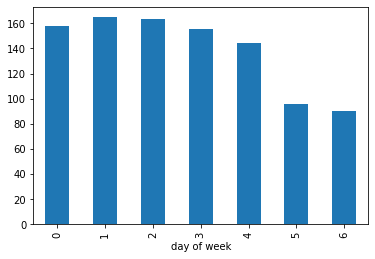

In [16]:
# continue to explore the day-wise passenger count.

train.groupby('day of week')['Count'].mean().plot.bar()

Passenger count dips on weekends.

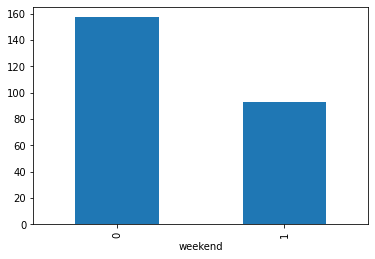

In [17]:
# Hypothesis 3: traffic is lower on weekends.
train.groupby('weekend')['Count'].mean().plot.bar()

Indeed weekend (1) traffic is lower than weekday (0).

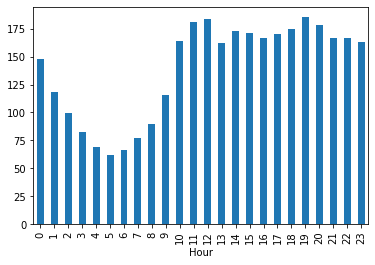

In [18]:
# Hypothesis 4: trafic will be higher during peak hours
# calculate mean hourly passenger count
train.groupby('Hour')['Count'].mean().plot.bar()

Peak traffic is between 10:00 to 20:00, then dips after midnight.

In [19]:
# Clean up the dataframe:

# remove unnecessary columns:
train=train.drop('ID',1)

In [20]:
# Since the hourly data is noisy, lets aggregate this to daily, weekly and monthly timeframes.
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [21]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

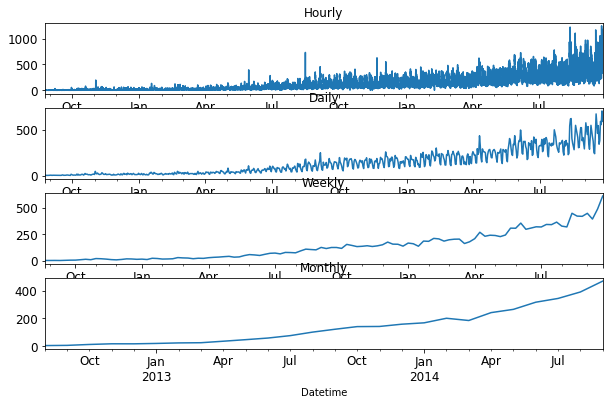

In [22]:
fig, axis = plt.subplots(4,1)
hourly.Count.plot(figsize=(10,6), title='Hourly', fontsize=12, ax=axis[0])
daily.Count.plot(figsize=(10,6), title='Daily', fontsize=12, ax=axis[1])
weekly.Count.plot(figsize=(10,6), title='Weekly', fontsize=12, ax=axis[2])
monthly.Count.plot(figsize=(10,6), title='Monthly', fontsize=12, ax=axis[3])

In [23]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [24]:
# Generate train-test sets:

# since this is timeseries data we need to maintain the temporal nature.
# hence preferably use a time-based split.

TrainD = train['2012-08-25':'2014-06-24']
ValidD = train['2014-06-25':'2014-09-25']

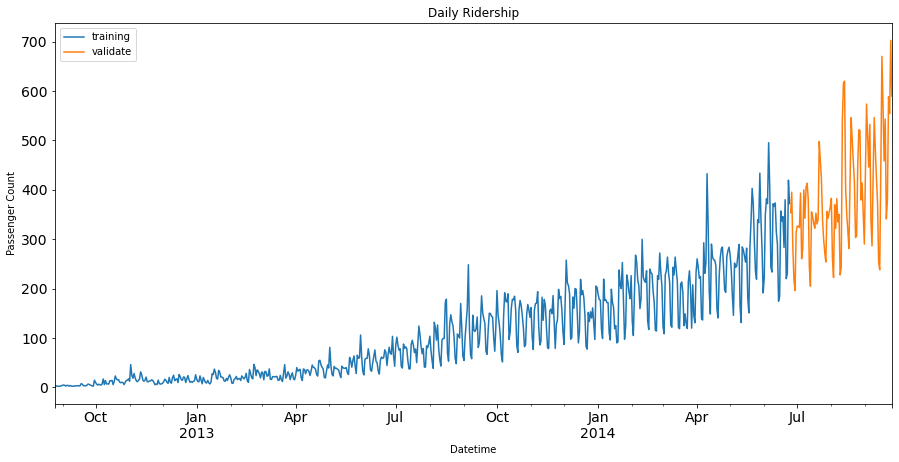

In [25]:
TrainD.Count.plot(figsize=(15,7), title='Daily Ridership', fontsize=14, label='training')
ValidD.Count.plot(figsize=(15,7), title='Daily Ridership', fontsize=14, label='validate')
plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

In [26]:
# Forecasting techniques

# Experiment with common forecasting techniques to generate the best model.
# i) Naive  ii) Moving Average  iii) Exponential smoothing  iv) Hotl's Linear Trend

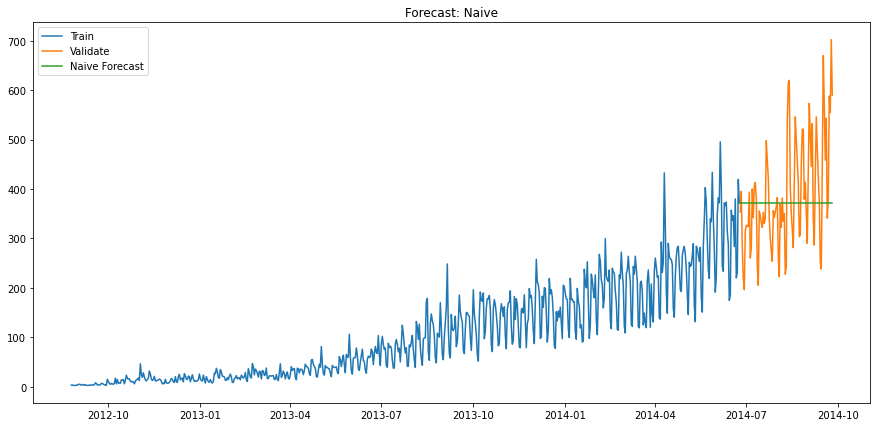

In [27]:
# i) forecast by Naive technique:
dd= np.asarray(TrainD.Count)
y_hat = ValidD.copy()
y_hat['naive']=dd[len(dd)-1]

plt.figure(figsize=(15,7))
plt.plot(TrainD.index, TrainD['Count'], label='Train')
plt.plot(ValidD.index, ValidD['Count'], label='Validate')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Forecast: Naive")
plt.show()

In [28]:
# check Naive accuracy from RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ValidD.Count, y_hat.naive))
print(rms)

111.79050467496724


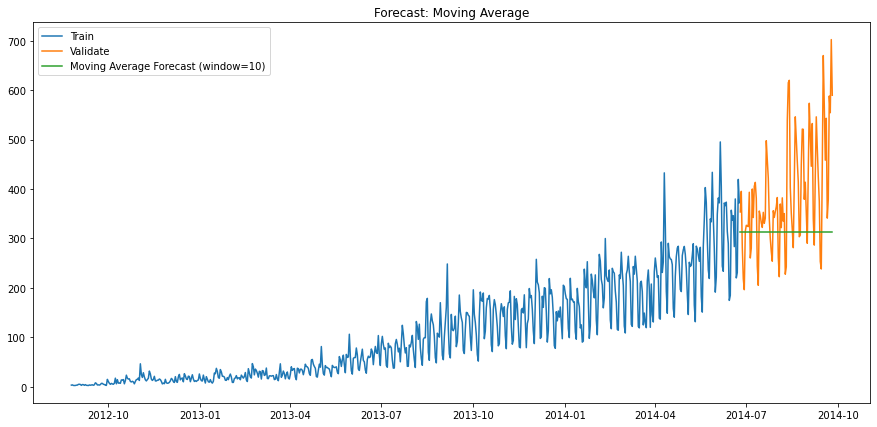

In [29]:
# ii) Forecast using Moving Average using a rolling window
y_hat_avg = ValidD.copy()
y_hat_avg['moving_avg_forecast'] = TrainD['Count'].rolling(10).mean().iloc[-1]
# avg over 10 observations

plt.figure(figsize=(15,7))
plt.plot(TrainD.index, TrainD['Count'], label='Train')
plt.plot(ValidD.index, ValidD['Count'], label='Validate')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast (window=10)')
plt.legend(loc='best')
plt.title("Forecast: Moving Average")
plt.show()

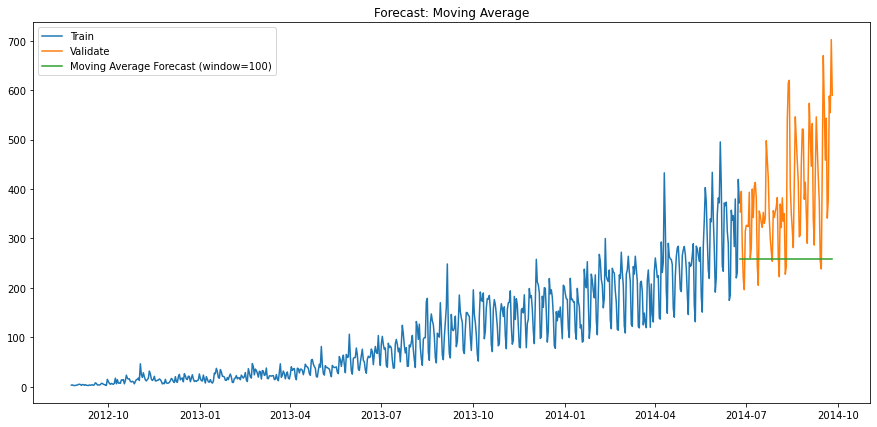

In [30]:
# changong the window size
y_hat_avg['moving_avg_forecast'] = TrainD['Count'].rolling(100).mean().iloc[-1]
# avg over 100 observations

plt.figure(figsize=(15,7))
plt.plot(TrainD.index, TrainD['Count'], label='Train')
plt.plot(ValidD.index, ValidD['Count'], label='Validate')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast (window=100)')
plt.legend(loc='best')
plt.title("Forecast: Moving Average")
plt.show()

Unfortunately, the predictions get weaker with increasing window size.

In [31]:
# check Moving Average accuracy from RMSE
rms = sqrt(mean_squared_error(ValidD.Count, y_hat_avg.moving_avg_forecast))
print(rms)

171.78590119726593


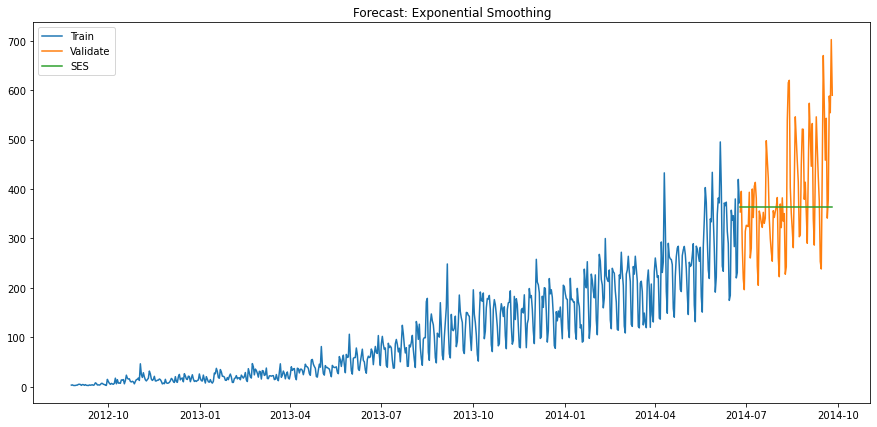

In [32]:
# iii) Forecast using Exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

y_hat_avg = ValidD.copy()
fit2 = SimpleExpSmoothing(np.asarray(TrainD['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES']=fit2.forecast(len(ValidD))

plt.figure(figsize=(15,7))
plt.plot(TrainD.index, TrainD['Count'], label='Train')
plt.plot(ValidD.index, ValidD['Count'], label='Validate')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.title("Forecast: Exponential Smoothing")
plt.show()

In [33]:
# check Exponential Smoothing accuracy from RMSE
rms = sqrt(mean_squared_error(ValidD.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

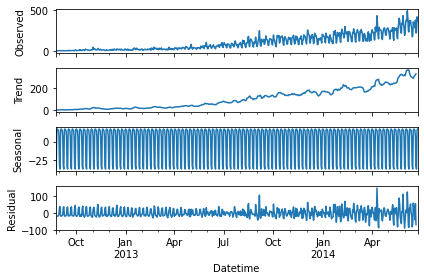

In [34]:
# iv) Forecast using Holt's Linear Trend

from statsmodels.tsa.api import Holt
import statsmodels.api as sm
sm.tsa.seasonal_decompose(TrainD.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

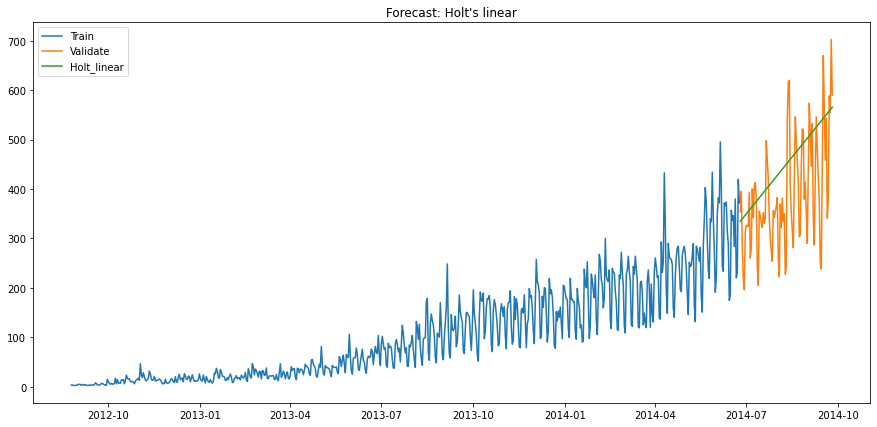

In [35]:
y_hat_avg = ValidD.copy()
fit1 = Holt(np.asarray(TrainD['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear']=fit1.forecast(len(ValidD))

plt.figure(figsize=(15,7))
plt.plot(TrainD.index, TrainD['Count'], label='Train')
plt.plot(ValidD.index, ValidD['Count'], label='Validate')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Forecast: Holt's linear")
plt.show()

In [36]:
# check Holts linear trend accuracy from RMSE
rms = sqrt(mean_squared_error(ValidD.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


Holt's Linear trend appears to fit the model the best.

In [37]:
# Use Holt's linear trend

# load hackathon submission file template:
submission = pd.read_csv(r"C:\Users\Ryan\Documents\courses- code\AnalyticsVidhya\Time Series Forecasting\data\sample_submission.csv")

In [38]:
# make a prediction for the test dataset
predict=fit1.forecast(len(test))

# save this as a new column
test['prediction'] = predict

# Calculate hourly ratio
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

# Group ratio by hour
temp = train_original.groupby(['Hour'])['ratio'].sum()

# format as csv
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GroupBy.csv')

temp2 = pd.read_csv("GroupBy.csv")
temp2 = temp2.drop('Hour.1',1)

In [39]:
# Merge Test and test_origianl on day, month, year
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['Hour']=merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)

In [40]:
# merge 'merge' and 'temp2' to make prediction
prediction = pd.merge(merge, temp2, on='Hour', how='left')

In [41]:
# convert ratio to original scale
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']

In [42]:
# drop all other features apart from ID and Count
submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis=1)

#convert final submission to csv
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt_linear.csv')

Try Holt's Winter model to account for seadonality in the data.

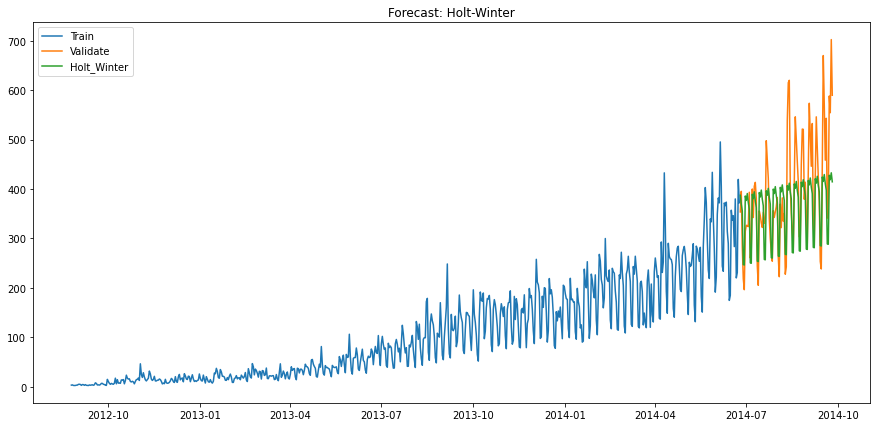

In [43]:
# Holt's Winter technique:
y_hat_avg = ValidD.copy()
fit1 = ExponentialSmoothing(np.asarray(TrainD['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter']=fit1.forecast(len(ValidD))

plt.figure(figsize=(15,7))
plt.plot(TrainD.index, TrainD['Count'], label='Train')
plt.plot(ValidD.index, ValidD['Count'], label='Validate')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title("Forecast: Holt-Winter")
plt.show()

In [44]:
# check Holt-Winter trend accuracy from RMSE
rms = sqrt(mean_squared_error(ValidD.Count, y_hat_avg.Holt_Winter))
print(rms)

82.38041226792582


In [45]:
# forecast the counts for the entire length of the test dataset
predict = fit1.forecast(len(test))

In [46]:
test['prediction'] = predict

# merge TestD and test_original for day, month, year
merge=pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','Datetime','Hour_x','Hour_y'], axis=1)

# merge 'merge' and 'temp2' to make prediction
prediction = pd.merge(merge, temp2, on='Hour', how='left')

# convert ratio to original scale
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']

# drop all other features apart from ID and Count
submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis=1)

# #convert final submission to csv
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt_Winter.csv')

Holt-Winters produces an RMSE of 328.35 on the leaderboard.

Use a model accounting for Trend and Seasonality in the timeseries. Consider the ARIMA model for timeseries forecasting.

ARIMA is Auto Regression Integrated Moving Average (specified by p,d,q) and functions similar to a linear regression.

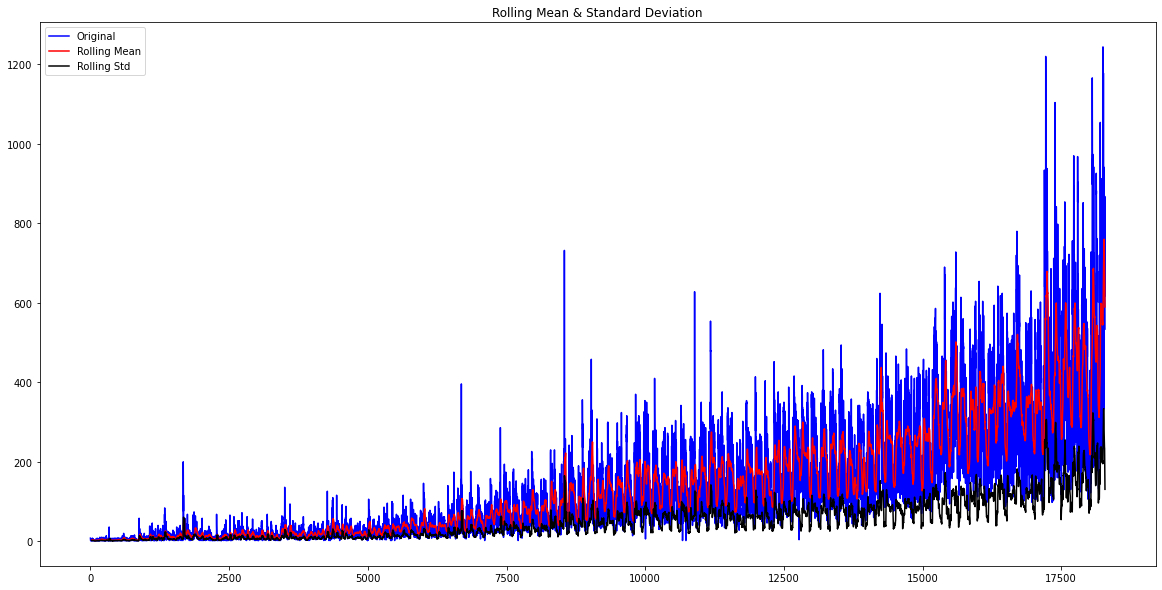

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [47]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(train_original):
        #Determing rolling statistics
    rolmean = train_original.rolling(24).mean() # 24 hours on each day
    rolstd = train_original.rolling(24).std()
        #Plot rolling statistics:
    orig = plt.plot(train_original, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(train_original, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])

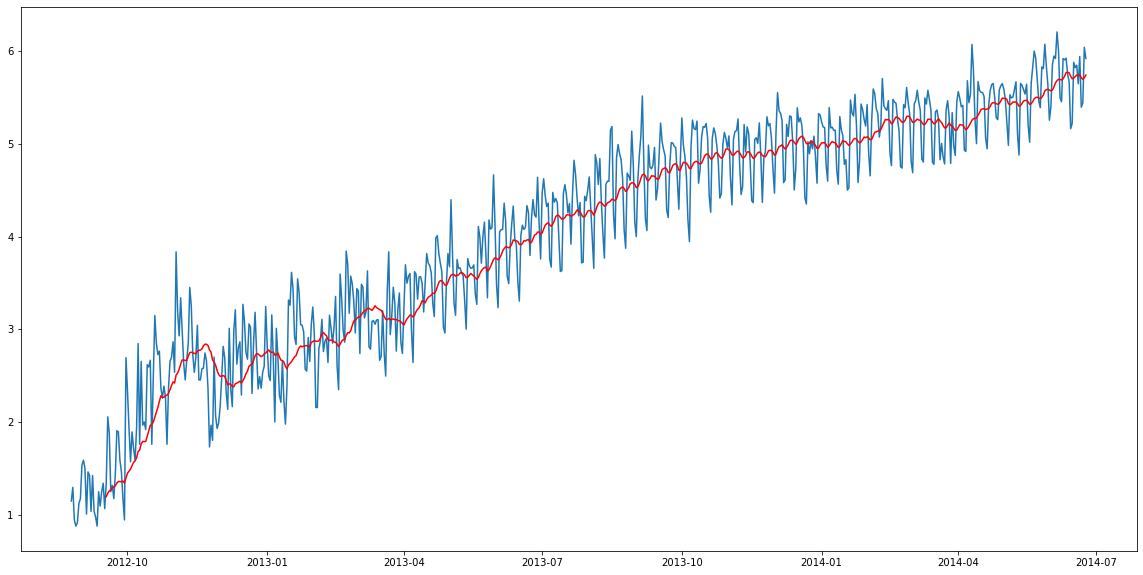

In [48]:
TrainD_log = np.log(TrainD['Count'])
ValidD_log = np.log(ValidD['Count'])

moving_avg = TrainD_log.rolling(24).mean()

plt.plot(TrainD_log)
plt.plot(moving_avg, color='red')
plt.show()

In [49]:
# remove trend to make timeseries stationary
train_log_moving_avg_diff = TrainD_log - moving_avg

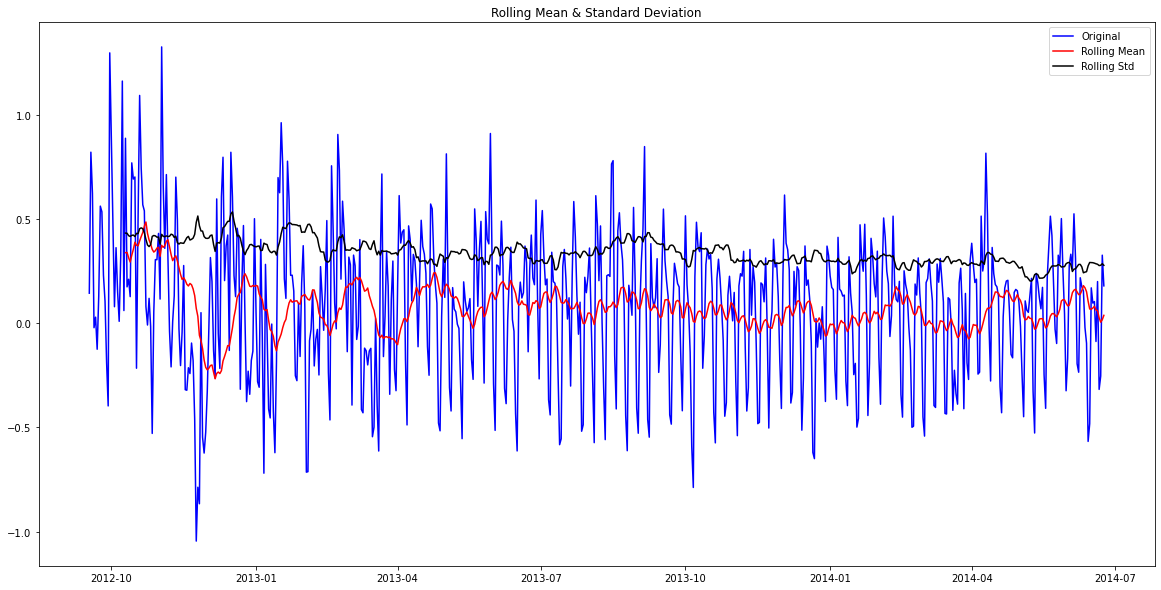

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [50]:
# drop the first 23 values as the first 24 were used to calculate the moving average:
train_log_moving_avg_diff.dropna(inplace=True) 
test_stationarity(train_log_moving_avg_diff)

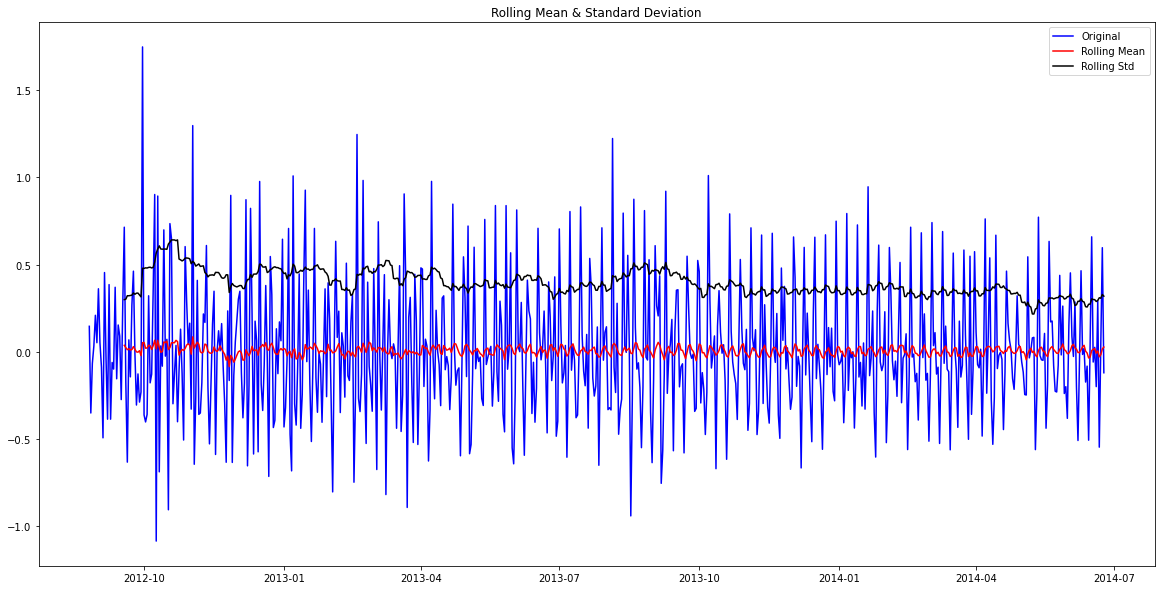

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [51]:
# use differencing to make the series stable and eliminate trend
train_log_diff = TrainD_log - TrainD_log.shift(1)
test_stationarity(train_log_diff.dropna())

In [52]:
# Remove seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

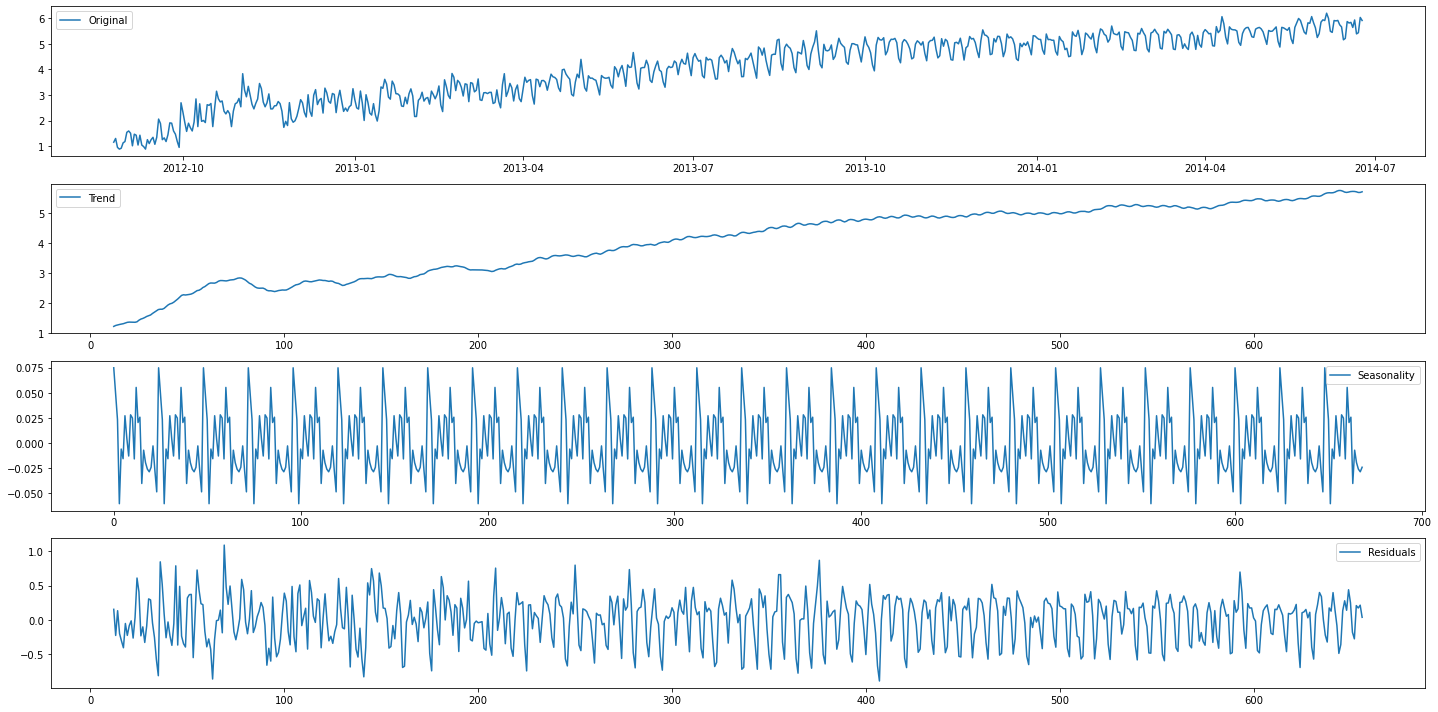

In [53]:
decomposition = seasonal_decompose(pd.DataFrame(TrainD_log).Count.values, freq=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(TrainD_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

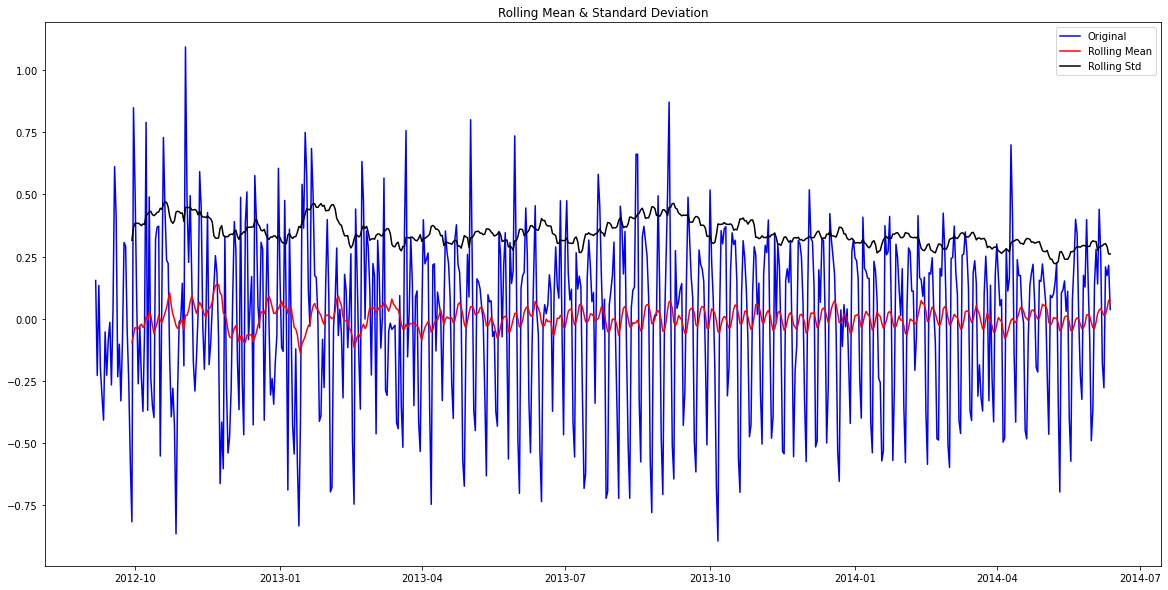

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [54]:
# check stationarity of residuals
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = TrainD_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

<function matplotlib.pyplot.show(*args, **kw)>

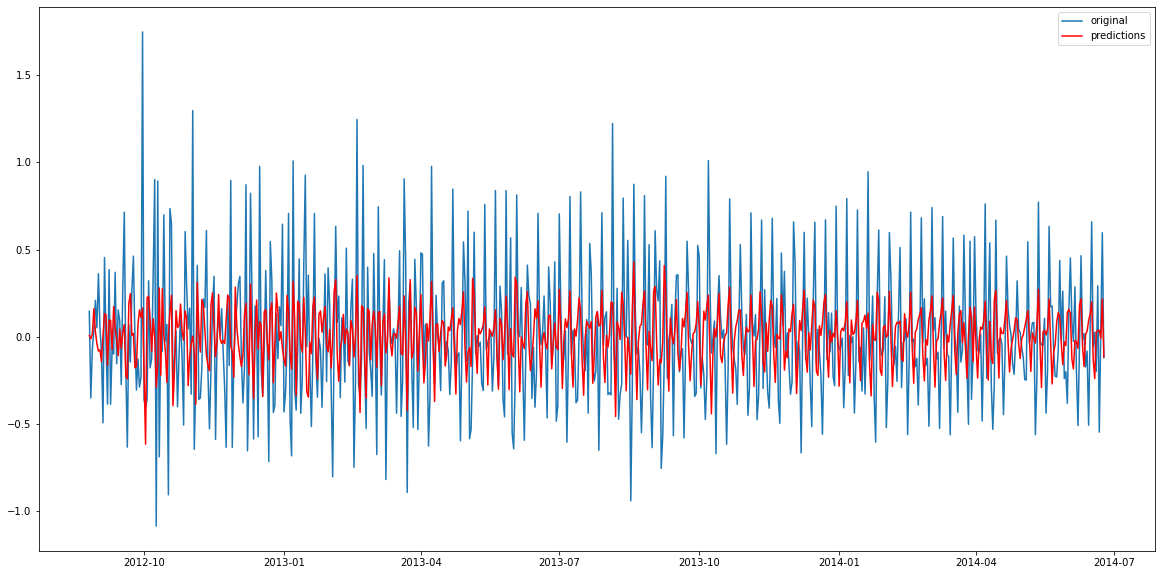

In [56]:
# Auto-regressive AR model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(TrainD_log, order=(2,1,0)) # here q=0

results_AR = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show

In [57]:
# validation curve for AR model
AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(ValidD.shape[0])*np.log(ValidD['Count'])[0], index=ValidD.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value=0)
AR_predict = np.exp(AR_predict1)

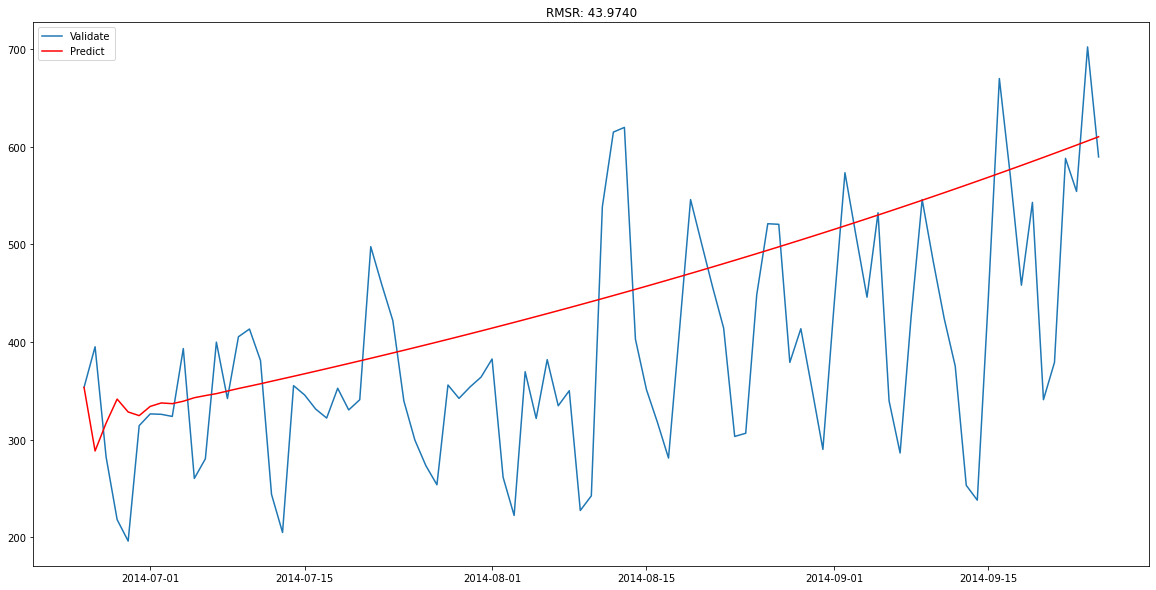

In [58]:
plt.plot(ValidD['Count'], label="Validate")
plt.plot(AR_predict, color='red', label="Predict")
plt.legend(loc='best')
plt.title('RMSR: %.4f'% (np.sqrt(np.dot(AR_predict, ValidD['Count']))/ValidD.shape[0]))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

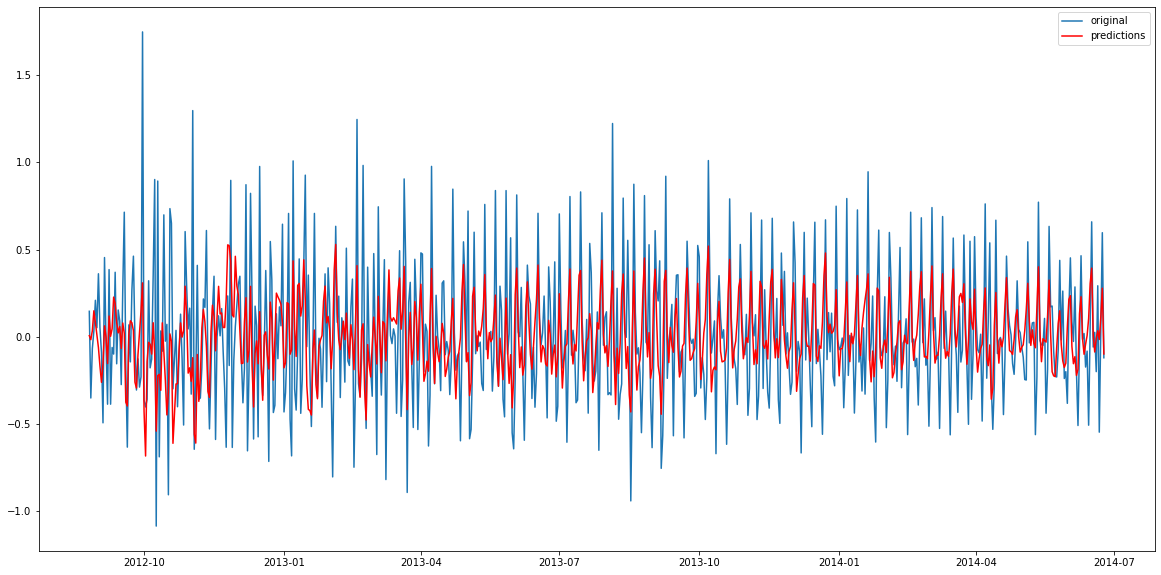

In [59]:
# Moving Average (MA) model

model = ARIMA(TrainD_log, order=(0,1,2)) # here p=0

results_MA = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show

In [60]:
# validation curve for MA model
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(ValidD.shape[0])*np.log(ValidD['Count'])[0], index=ValidD.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value=0)
MA_predict = np.exp(MA_predict1)

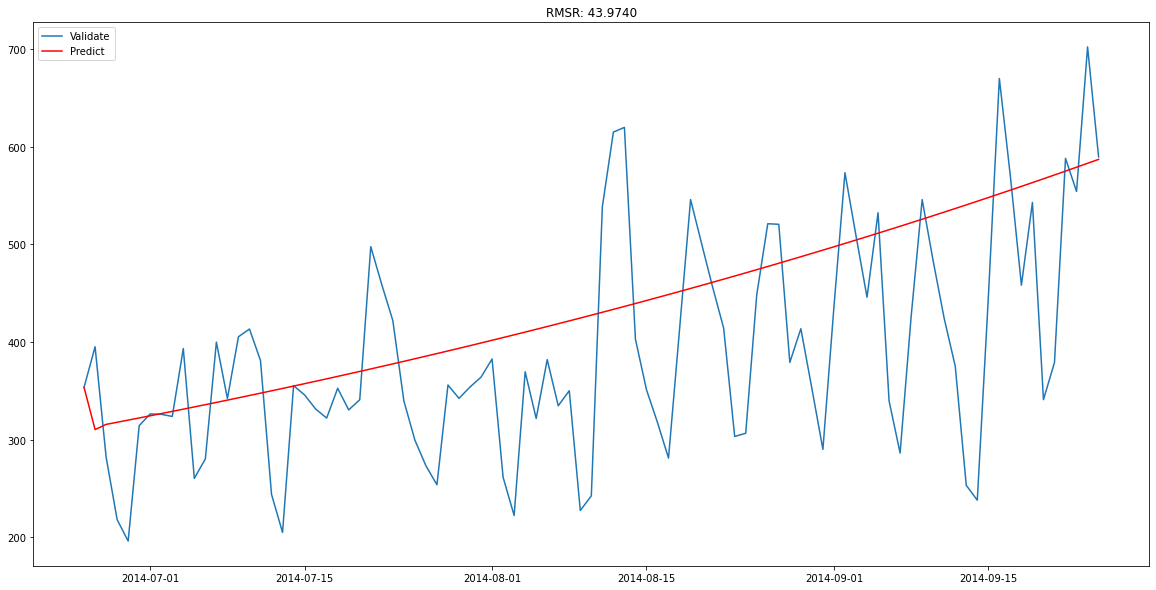

In [61]:
plt.plot(ValidD['Count'], label="Validate")
plt.plot(MA_predict, color='red', label="Predict")
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, ValidD['Count']))/ValidD.shape[0]))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

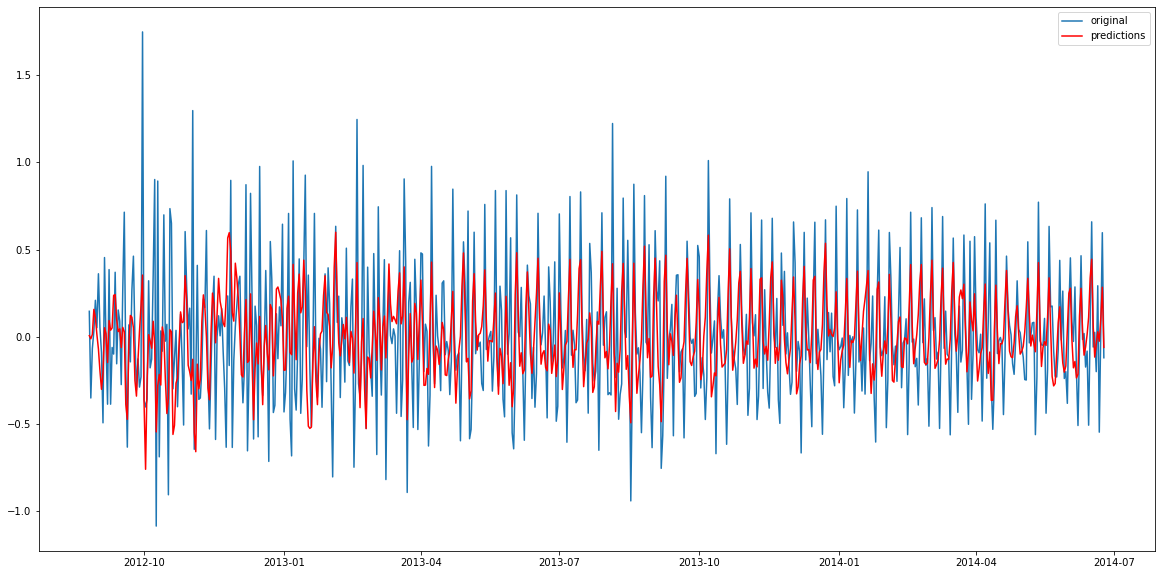

In [62]:
# combined AR & MA models (AR I MA)

model = ARIMA(TrainD_log, order=(2,1,2)) # here p=0

results_ARIMA = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show

In [82]:
# define a function for scaling models

def check_prediction_diff(predict_diff, given_set):
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0])*np.log(given_set['Count'])[0], index=given_set.index)
    predict_log = predict_base.add(predict_diff, fill_value=0)
    predict = np.exp(predict_log)

In [84]:
plt.plot(given_set['Count'], label="Given Set")
plt.plot(predict, color='red', label="Predict")
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, ValidD['Count']))/ValidD.shape[0]))
plt.show()

NameError: name 'given_set' is not defined

In [78]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)

In [80]:
plt.plot(given_set['Count'], label="Given Set")
plt.plot(predict, color='red', label="Predict")
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, ValidD['Count']))/ValidD.shape[0]))
plt.show()

NameError: name 'given_set' is not defined

In [83]:
ARIMA_predict_diff = results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, ValidD)

C:\Users\Ryan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


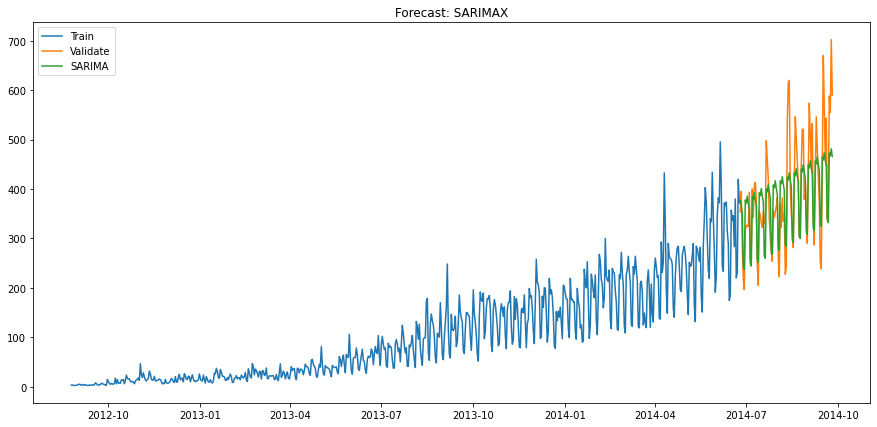

In [86]:
# SARIMAX model on daily time series
# SARIMAX takes into account the seasonality of the time series.

import statsmodels.api as sm

y_hat_avg = ValidD.copy()

fit1 = sm.tsa.statespace.SARIMAX(TrainD.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-06-25", end="2014-09-25", dynamic=True)

plt.figure(figsize=(15,7))
plt.plot(TrainD['Count'], label='Train')
plt.plot(ValidD['Count'], label='Validate')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title("Forecast: SARIMAX")
plt.show()

In [87]:
# check RMSE
rms = sqrt(mean_squared_error(ValidD.Count, y_hat_avg.SARIMA))
print(rms)

69.85082200639262


In [88]:
# Forecast the timeseries for the test data:
predict = fit1.predict(start="2014-06-25", end="2014-09-25", dynamic=True)

test['prediction'] = predict

# Merge Test and test_origianl on day, month, year
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['Hour']=merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)

# merge 'merge' and 'temp2' to make prediction
prediction = pd.merge(merge, temp2, on='Hour', how='left')

# converting ratio to original scale
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

# drop unnecessary variables (but keep ID and Count)
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis=1)

#convert final submission to csv
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

This technique provided the least RMSE score, which on the leaderboard was 219.095